# **Predicting Credit Loan Approval**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from io import StringIO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset

loan_path = '/content/loan_approval_dataset.csv'
loan = pd.read_csv(loan_path)

## **Preliminary Examination and Exploratory Data Analysis**

In [ ]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
loan.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# Strip whitespace from column names

loan.columns = loan.columns.str.strip()
loan['loan_status'] = loan['loan_status'].str.strip()

In [ ]:
# Percentage of Loan Rejections and Approvals

loan['loan_status'].value_counts() * 100 / len(loan)

,count
loan_status,
Approved,62.215976
Rejected,37.784024


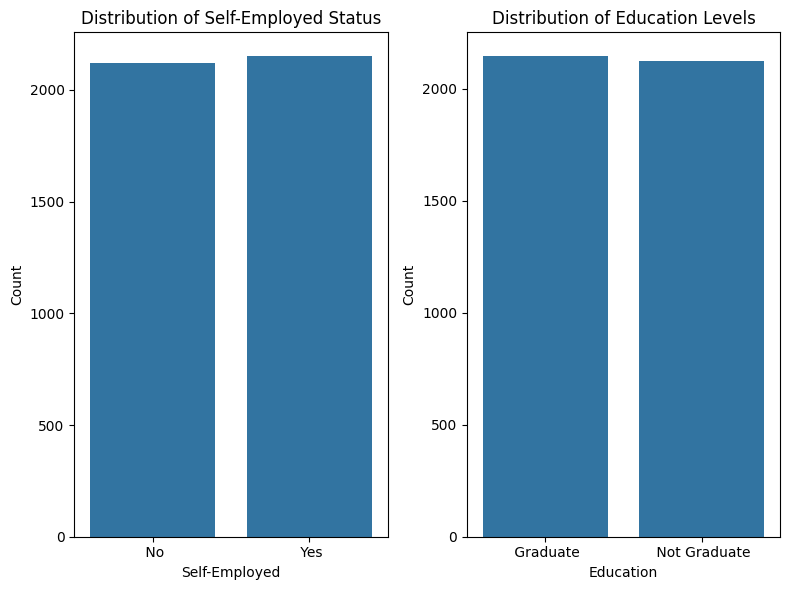

In [ ]:
# Looking at distributions of employment and education

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 6))

sns.countplot(x = 'self_employed', data = loan, ax = ax1)
ax1.set_title('Distribution of Self-Employed Status')
ax1.set_xlabel('Self-Employed')
ax1.set_ylabel('Count')

sns.countplot(x = 'education', data = loan, ax = ax2)
ax2.set_title('Distribution of Education Levels')
ax2.set_xlabel('Education')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

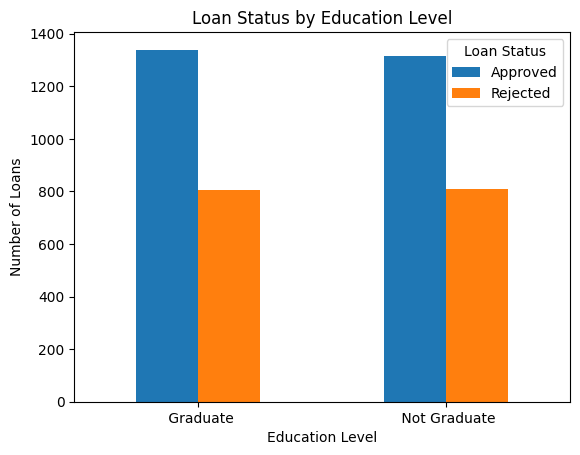

In [ ]:
# Loan status by education

education_loan_status = loan.groupby(['education', 'loan_status']).size().unstack()

education_loan_status.plot(kind = 'bar', stacked = False)
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Loans')
plt.xticks(rotation = 0)
plt.legend(title = 'Loan Status')
plt.show()

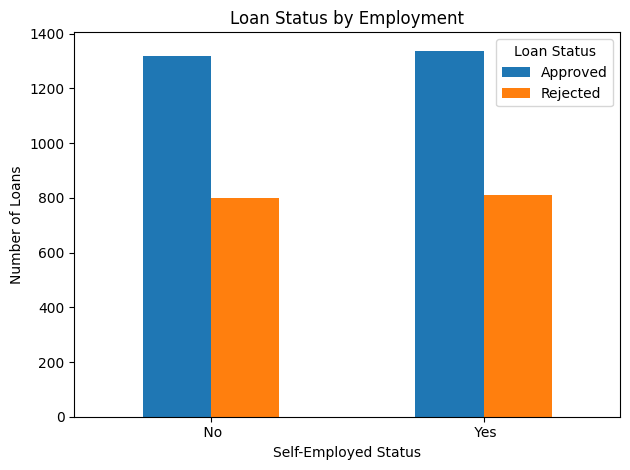

In [ ]:
# Loan Status by Employment

employment_loan_status = loan.groupby(['self_employed', 'loan_status']).size().unstack()

employment_loan_status.plot(kind = 'bar', stacked = False)
plt.title('Loan Status by Employment')
plt.xlabel('Self-Employed Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation = 0)
plt.legend(title = 'Loan Status')
plt.tight_layout()
plt.show()

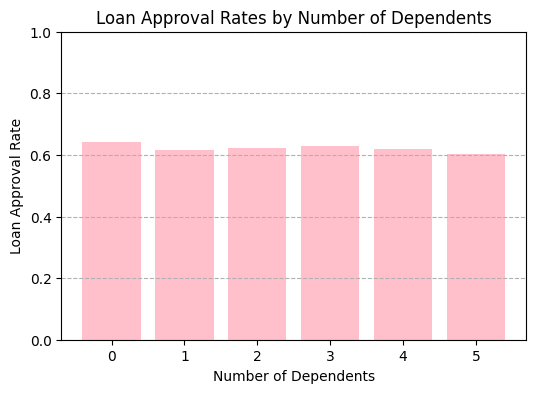

In [ ]:
# Distribution of number of dependants in the dataset

dependents_distribution = loan.groupby(['no_of_dependents', 'loan_status']).size().unstack()

dependents_distribution['Approval_Rate'] = dependents_distribution['Approved'] / (
    dependents_distribution['Approved'] + dependents_distribution['Rejected']
)

plt.figure(figsize = (6, 4))
plt.bar(dependents_distribution.index, dependents_distribution['Approval_Rate'], color = 'pink')
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Approval Rate')
plt.title('Loan Approval Rates by Number of Dependents')
plt.ylim(0, 1)
plt.xticks(dependents_distribution.index)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

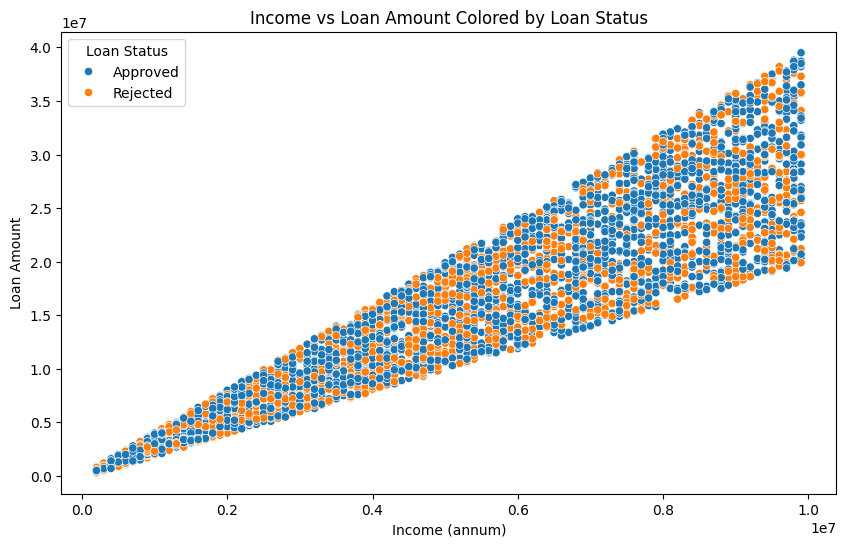

In [ ]:
# Loan Status and Income Level with Loan Amount

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'income_annum', y = 'loan_amount', hue = 'loan_status', data = loan)
plt.title('Income vs Loan Amount Colored by Loan Status')
plt.xlabel('Income (annum)')
plt.ylabel('Loan Amount')
plt.legend(title = 'Loan Status')
plt.show()

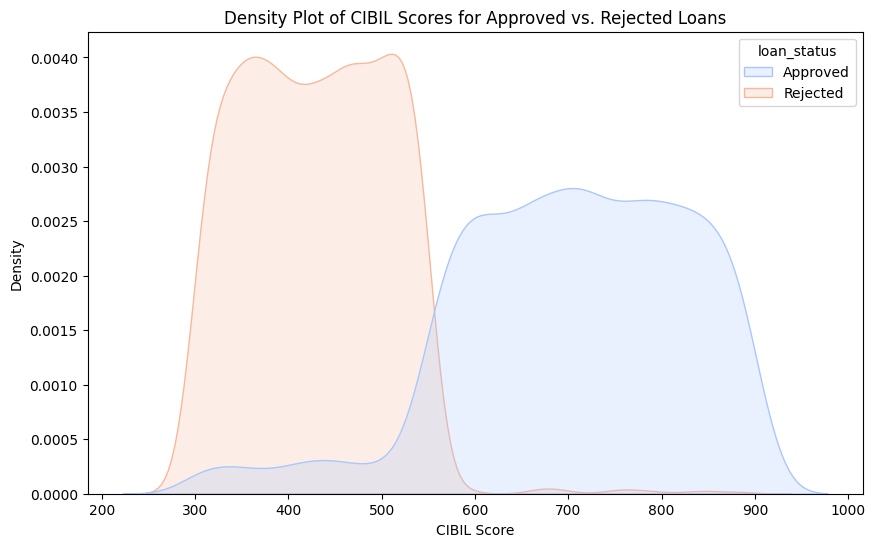

In [ ]:
# Credit Scores and Loan Status

plt.figure(figsize = (10, 6))
sns.kdeplot(data = loan, x = 'cibil_score', hue = 'loan_status', fill = True, common_norm = False, palette = "coolwarm")
plt.title('Density Plot of CIBIL Scores for Approved vs. Rejected Loans')
plt.xlabel('CIBIL Score')
plt.ylabel('Density')
plt.show()

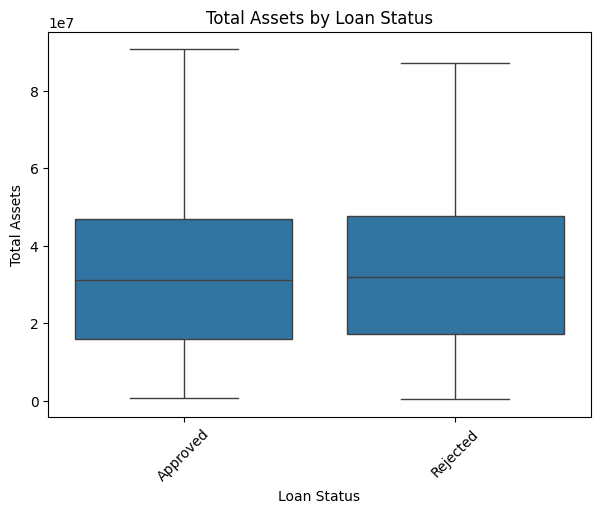

In [ ]:
# Calculate total assets for generalization

loan['total_assets'] = (loan['residential_assets_value'] +
                            loan['commercial_assets_value'] +
                            loan['luxury_assets_value'] +
                            loan['bank_asset_value'])

loan.columns = loan.columns.str.replace(' ', '')

# Total assets by loan status

plt.figure(figsize = (7, 5))
sns.boxplot(x = 'loan_status', y = 'total_assets', data = loan)
plt.xticks(rotation = 45)
plt.title('Total Assets by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Assets')
plt.show()

Comparing mean assets of both loan status groups by each asset type to check if there is any significant difference:

In [ ]:
print(loan.groupby('loan_status')['residential_assets_value'].mean())

loan_status
Approved    7.399812e+06
Rejected    7.592498e+06
Name: residential_assets_value, dtype: float64


In [ ]:
print(loan.groupby('loan_status')['commercial_assets_value'].mean())

loan_status
Approved    5.001355e+06
Rejected    4.926720e+06
Name: commercial_assets_value, dtype: float64


In [ ]:
print(loan.groupby('loan_status')['luxury_assets_value'].mean())

loan_status
Approved    1.501660e+07
Rejected    1.530694e+07
Name: luxury_assets_value, dtype: float64


In [ ]:
print(loan.groupby('loan_status')['bank_asset_value'].mean())

loan_status
Approved    4.959526e+06
Rejected    5.004960e+06
Name: bank_asset_value, dtype: float64


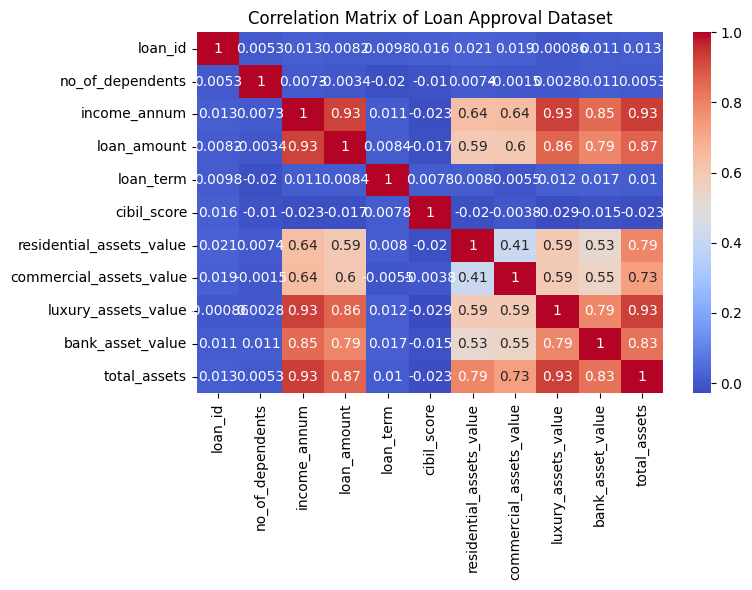

In [ ]:
# Finally, let's look at the correlation matrix

correlation_matrix = loan.select_dtypes(include = np.number).corr()

plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Loan Approval Dataset')
plt.tight_layout()
plt.show()

## **Predictive Modeling**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y = loan['loan_status']
X = loan[['total_assets', 'income_annum', 'loan_amount', 'cibil_score', 'loan_term', 'no_of_dependents']]

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

NameError: name 'LabelEncoder' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Scaling the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Constructing the Baseline Model

majority_class = np.bincount(y_train).argmax()
y_pred_baseline = np.full(len(y_test), majority_class)

In [ ]:
# Constructing Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
# Constructing Random Forest

random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [ ]:
# Constructing KNN model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

## **Performance Evaluations of the Models**

**Baseline model performance:**

In [ ]:
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy:", baseline_accuracy)

Baseline Model Accuracy: 0.6276346604215457


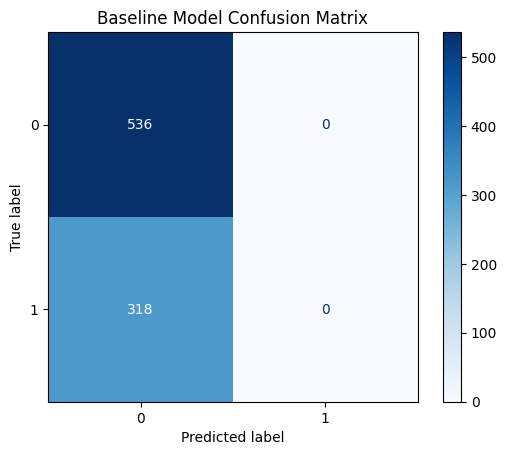

In [ ]:
baseline_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_baseline))
baseline_disp.plot(cmap = 'Blues')
plt.title("Baseline Model Confusion Matrix")
plt.show()

**Logistic model performance**

In [ ]:
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Precision:", logreg_precision)

Logistic Regression Accuracy: 0.9074941451990632
Logistic Regression Precision: 0.8817891373801917


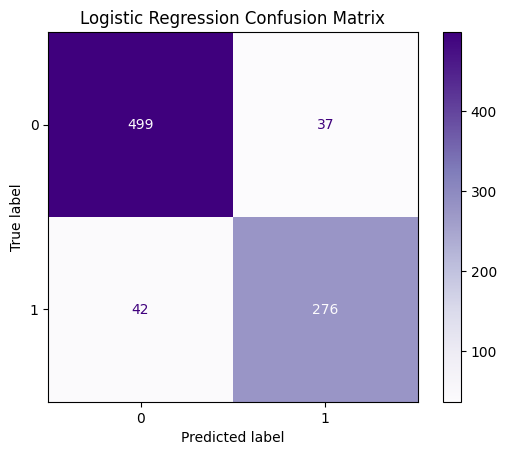

In [ ]:
logreg_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg))
logreg_disp.plot(cmap = 'Purples')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

**Random forest performance**

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)

Random Forest Accuracy: 0.9824355971896955
Random Forest Precision: 0.9809523809523809


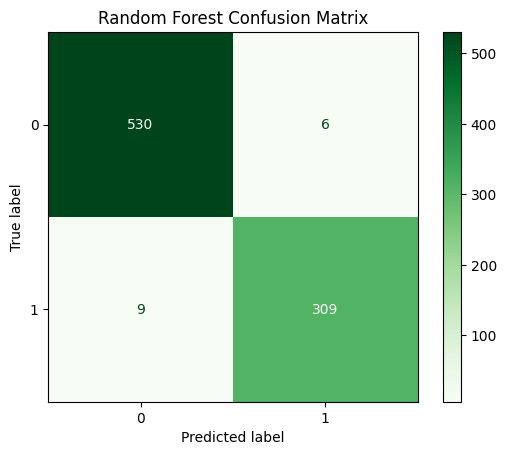

In [ ]:
rf_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf))
rf_disp.plot(cmap = 'Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

**KNN model performance**

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)

KNN Accuracy: 0.9355971896955504
KNN Precision: 0.9174603174603174


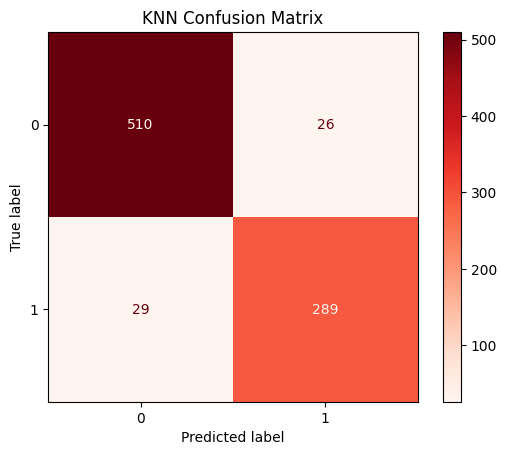

In [ ]:
knn_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn))
knn_disp.plot(cmap = 'Reds')
plt.title("KNN Confusion Matrix")
plt.show()

**Comparing models' precision and accuracy scores:**

In [ ]:
print(f"Baseline Accuracy: {baseline_accuracy}")
print(f"Logistic Model Accuracy: {logreg_accuracy}, Precision: {logreg_precision}")
print(f"Random Forest Accuracy: {rf_accuracy}, Precision: {rf_precision}")
print(f"KNN Accuracy: {knn_accuracy}, Precision: {knn_precision}")

Baseline Accuracy: 0.6276346604215457
Logistic Model Accuracy: 0.9074941451990632, Precision: 0.8817891373801917
Random Forest Accuracy: 0.9824355971896955, Precision: 0.9809523809523809
KNN Accuracy: 0.9355971896955504, Precision: 0.9174603174603174


Clearly, Random Forest model outperforms the rest.

In [ ]:
# K-fold cross-validation of the random forest model:

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
cv_scores = cross_val_score(random_forest, X_train, y_train, cv = kf, scoring = 'accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Average Cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy scores: [0.98830409 0.98245614 0.97368421 0.99122807 0.97660819 0.98240469
 0.98533724 0.99120235 0.99120235 0.97653959]
Average Cross-validation accuracy: 0.9838966918763183


In [ ]:
# Identifying the most important features from Random Forest

feature_importances = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting by importance

top_features = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print("Top features based on importance:")
print(top_features)

Top features based on importance:
            Feature  Importance
3       cibil_score    0.837400
4         loan_term    0.065763
2       loan_amount    0.037471
1      income_annum    0.025252
0      total_assets    0.024888
5  no_of_dependents    0.009225
